## 1. Frame the problem
* As a Business manager try to find the weak areas  where you can work to make more profit
* What all business problems you can derive by exploring the data


## 2. Get the data

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('SampleSuperstore.csv')

## 3. Discover and visualize the data to gain insights

In [4]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


### Shape of data:

In [5]:
df.shape

(9994, 13)

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


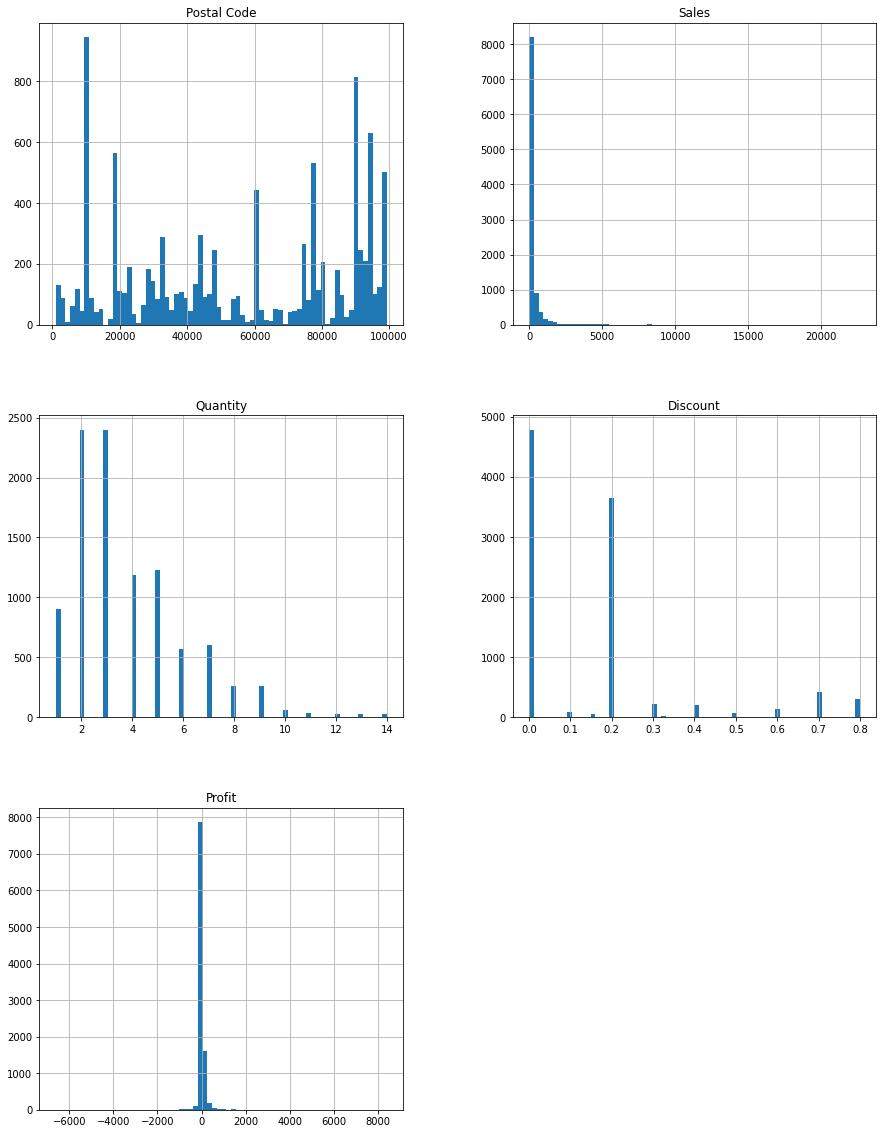

In [8]:
df.hist(figsize=(15,20),bins= 70);

## checking for null values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


#### no null values in the data set

## checking for unique values in each column

In [10]:
for i in df:
    print(df[i].name,df[i].nunique())


Ship Mode 4
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287


### Looking for correlation

In [11]:
corrl = df.drop('Postal Code', axis =1 ).corr()

In [12]:
corrl

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


from correlation matrix it turns out that Profit is positively correlated with Sales

Text(0, 0.5, 'Profit')

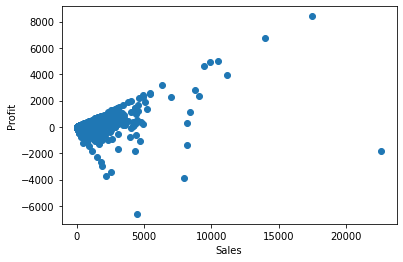

In [13]:
plt.scatter(df['Sales'],df['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')

## looking in Regions data

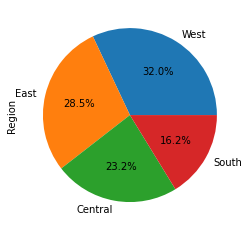

In [17]:
R = df['Region'].value_counts()
R.plot.pie(autopct="%.1f%%");


Text(0.5, 1.0, 'Profit')

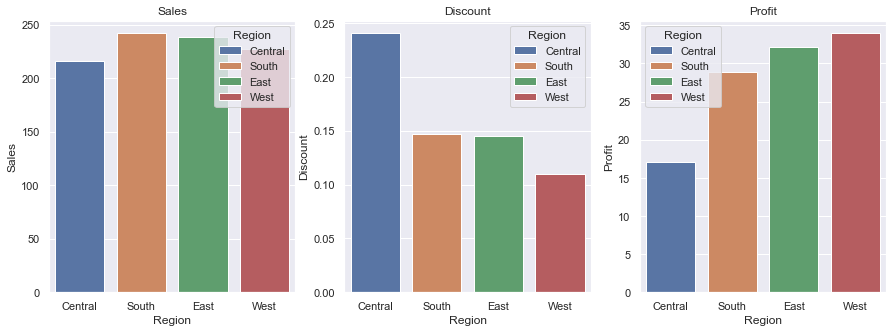

In [ ]:
Regions = df.groupby('Region')[['Sales','Profit','Discount']].mean().reset_index().sort_values(by = 'Discount',ascending=False)
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

sns.barplot(ax = axes[0],x= 'Region', y = 'Sales', hue='Region',data =Regions,dodge=False);
axes[0].set_title('Sales')
sns.barplot(ax = axes[1],x= 'Region', y = 'Discount', hue='Region',data =Regions,dodge=False);
axes[1].set_title('Discount')

sns.barplot(ax = axes[2],x= 'Region', y = 'Profit', hue='Region',data =Regions,dodge=False);
axes[2].set_title('Profit')


1. Central Region Discounts is very high which caused very low Profit compared to other regions
2. West region has the highe sales and the highest profit average 

Text(0, 0.5, 'Profit')

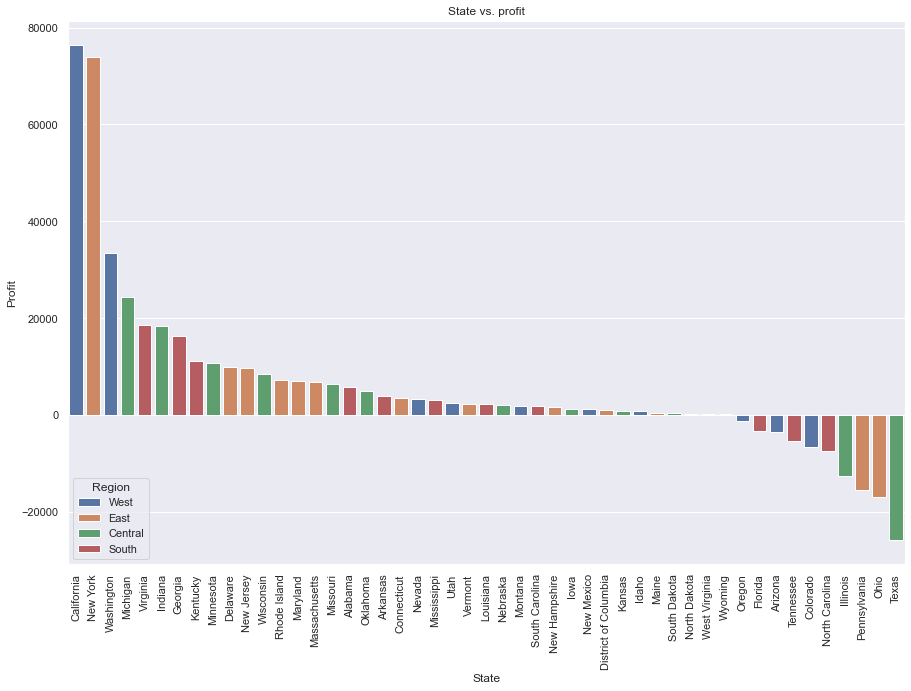

In [85]:

Segments_P = df.groupby(['State','Region'])['Profit'].sum().reset_index().sort_values(by = 'Profit',ascending=False)

sns.barplot(x= 'State', y = 'Profit', hue='Region',data =Segments_P,dodge=False);
plt.xticks(rotation=90);
plt.title('State vs. profit')
plt.xlabel('State')
plt.ylabel('Profit')

Text(0, 0.5, 'Sales')

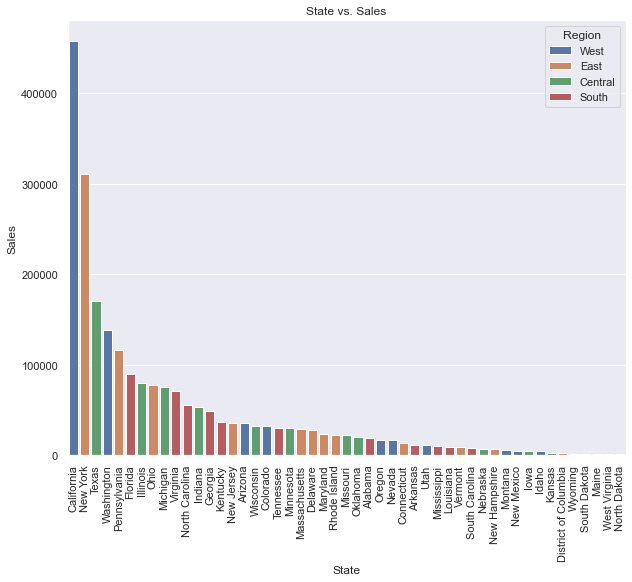

In [117]:
Segments_S = df.groupby(['State','Region'])['Sales'].sum().reset_index().sort_values(by = 'Sales',ascending=False)
sns.set(rc = {'figure.figsize':(10,8)})
sns.barplot(x= 'State', y = 'Sales', hue='Region',data =Segments_S,dodge=False);
plt.xticks(rotation=90);
plt.title('State vs. Sales')
plt.xlabel('State')
plt.ylabel('Sales')

Sales in Kansas, South Dakota, Maine, West Virginia and North Dadota is around zero, Super Stores are advised to Change their marketing Strategy in tese states


Text(0, 0.5, 'Discount')

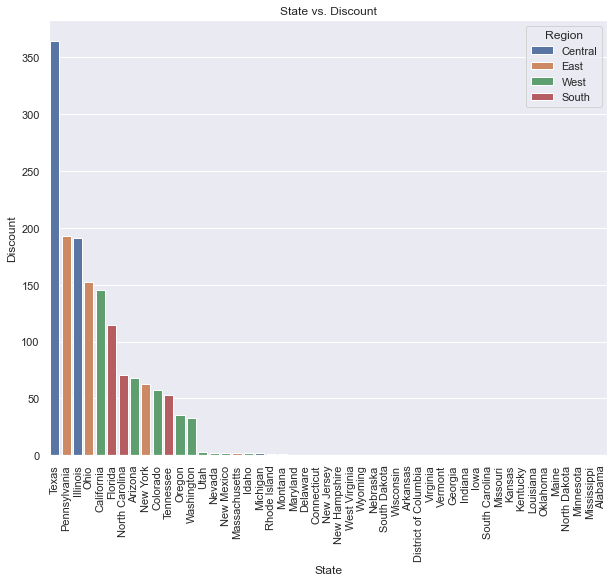

In [67]:
Segments = df.groupby(['State','Region'])['Discount'].sum().reset_index().sort_values(by = 'Discount',ascending=False)
sns.set(rc = {'figure.figsize':(10,8)})
sns.barplot(x= 'State', y = 'Discount', hue='Region',data =Segments,dodge=False);
plt.xticks(rotation=90);
plt.title('State vs. Discount')
plt.xlabel('State')
plt.ylabel('Discount')

From the three plots we can tell:
1. California, New York and Texas have the highest sales amount 
2. In contrast Texas has the highest loss may be caused by the high Discounts compared to California and NewYork
3. Super stores are advised to lessen their discount Percentage in central region specifically in Texas 

### Sudying States of high profit and high loss
* California, New York, Washington, Michigan, Virginia
* Texas,Ohio, Pennsylvania, illinois, North Carolina

In [29]:
States_of_interest = ['California', 'New York', 'Washington', 'Michigan', 'Virginia','Texas','Ohio', 'Pennsylvania', 'Illinois', 'North Carolina']

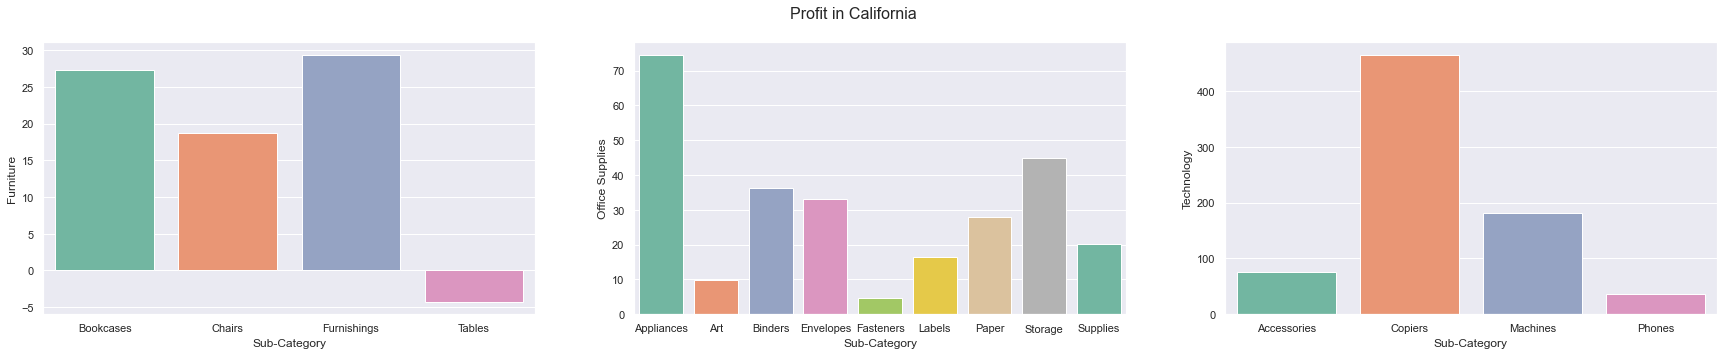

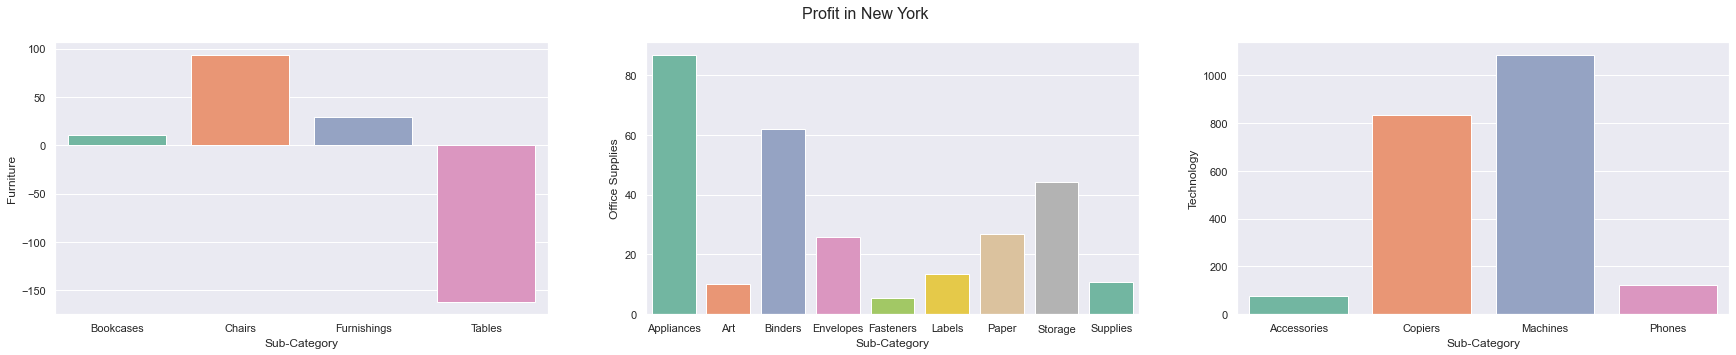

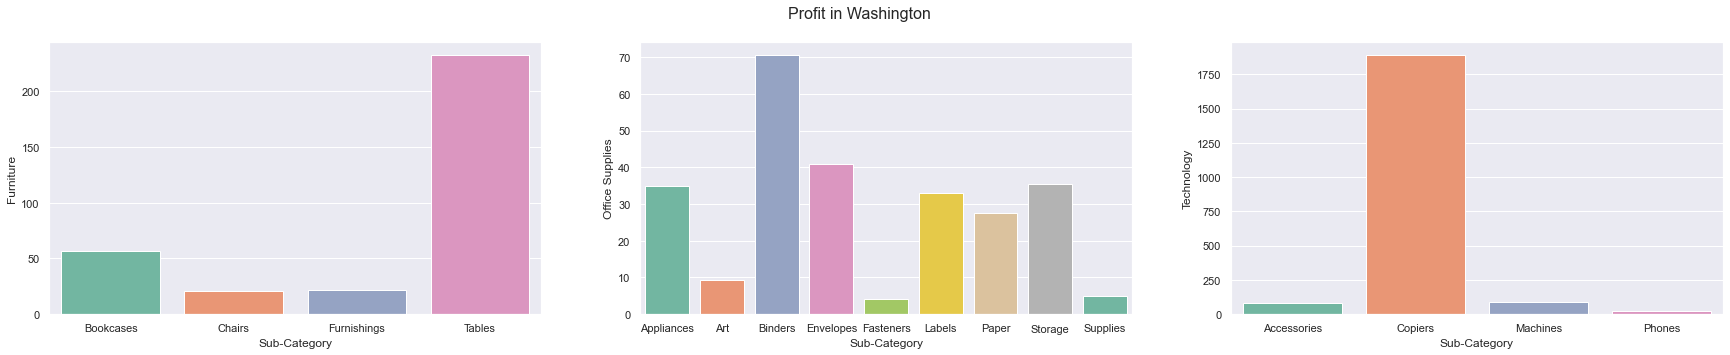

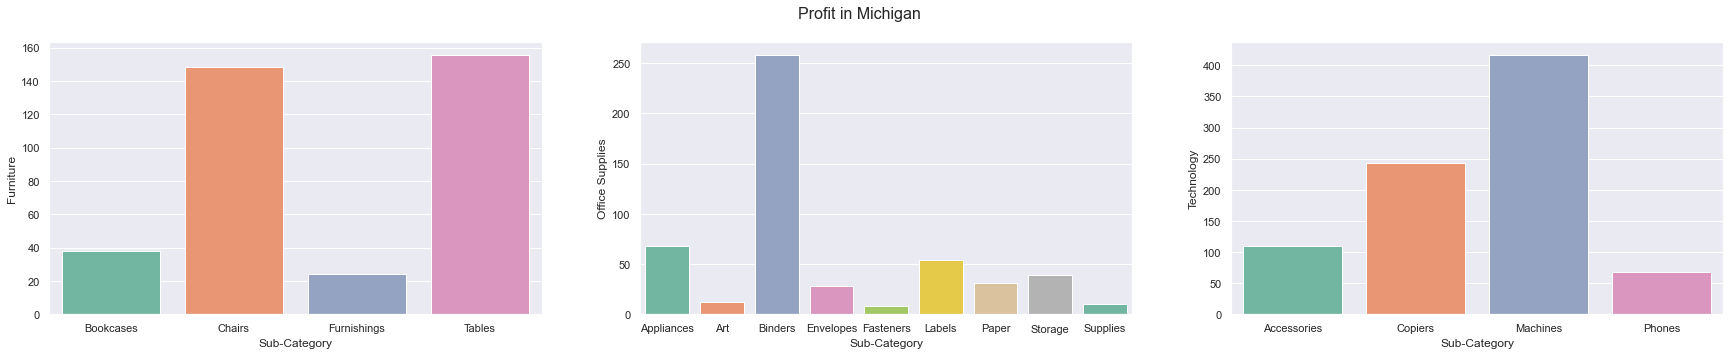

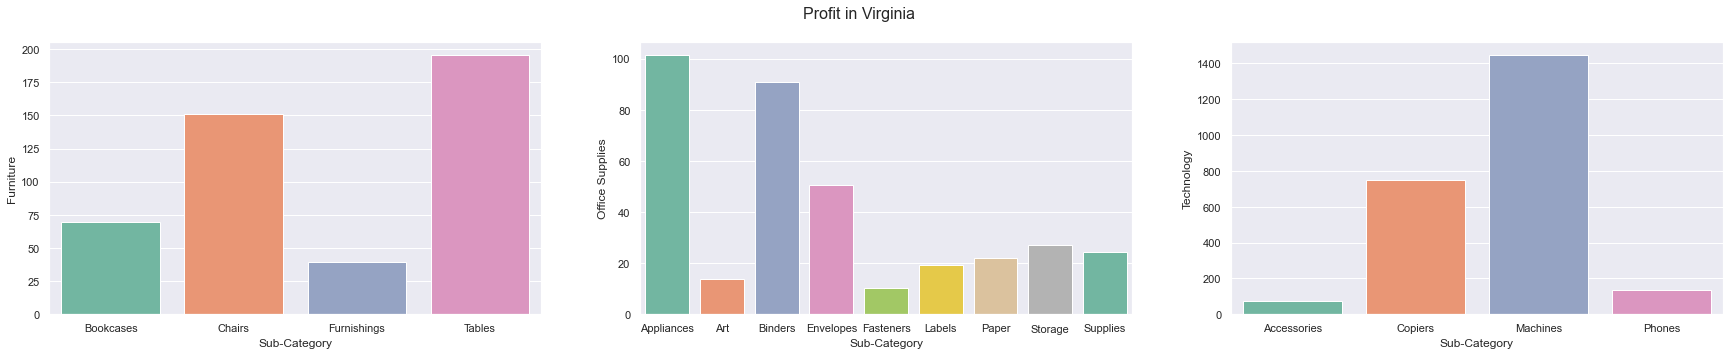

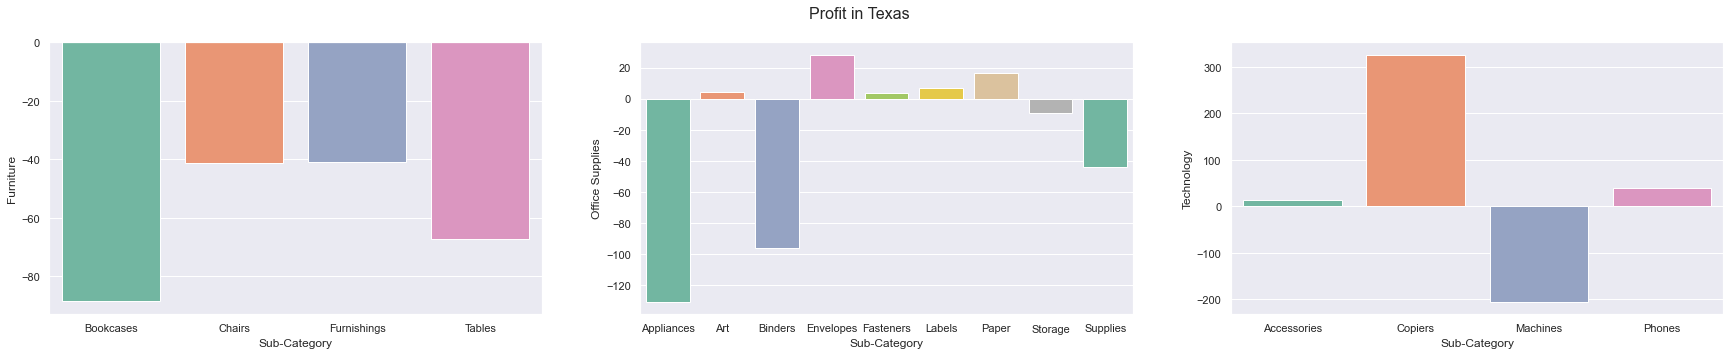

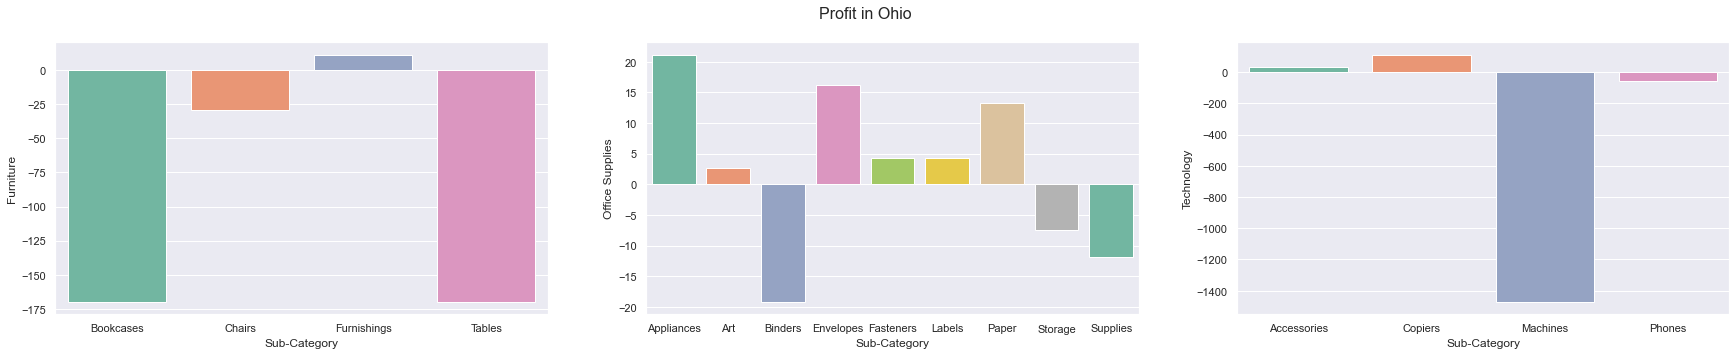

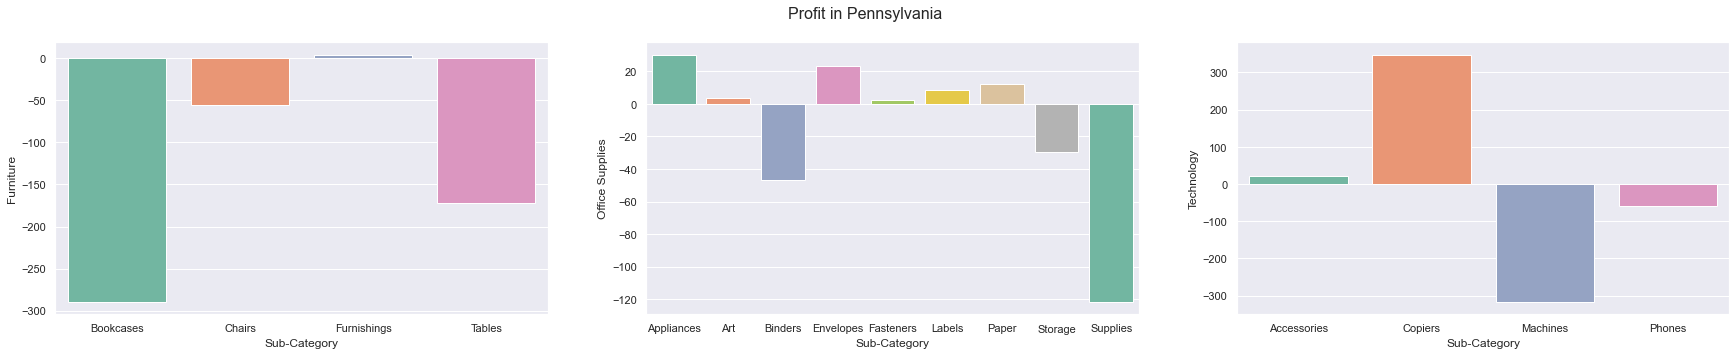

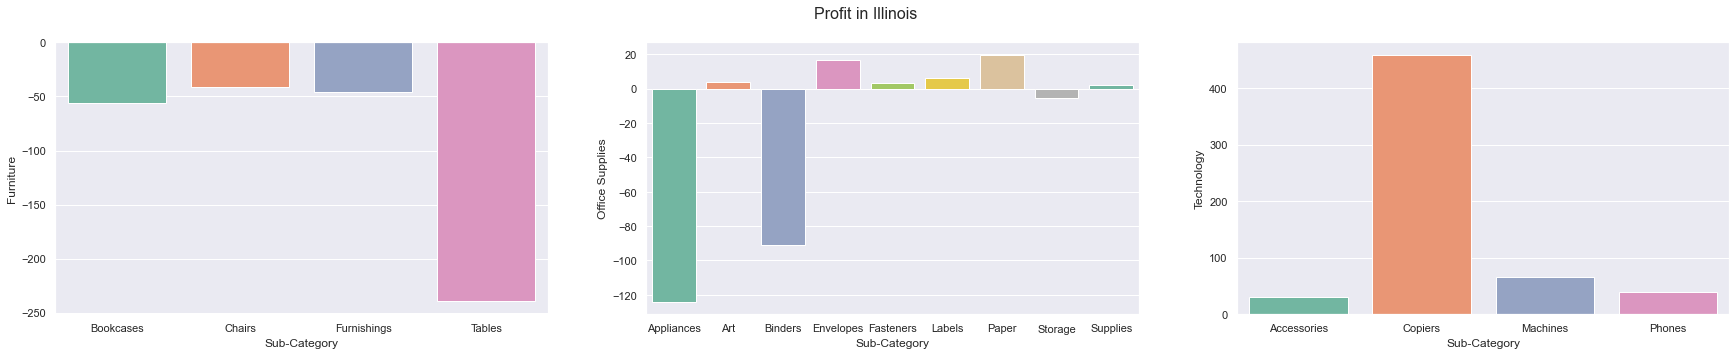

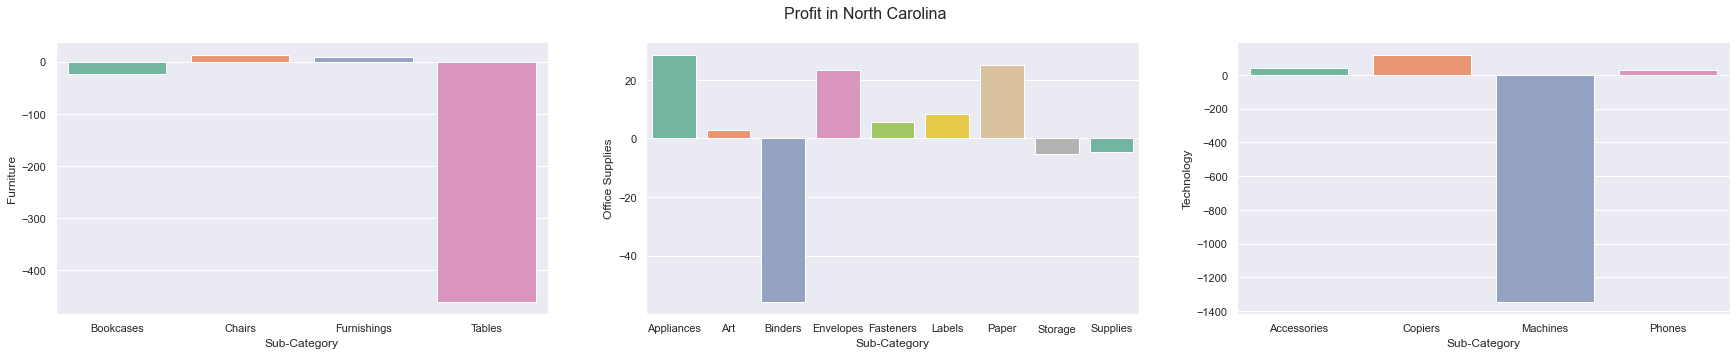

In [93]:
states_grouped = df.groupby(['State'])
for state in States_of_interest:
        data = states_grouped.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (30, 5))
        fig.suptitle('Profit in ' + state, fontsize = 16)        
        ax_index = 0
        for category in df['Category'].unique():
                category_data = data.get_group(category).groupby(['Sub-Category']).mean()
                sns.barplot(x = category_data.index, y = category_data.Profit, 
                        ax = ax[ax_index],palette = 'Set2')
                ax[ax_index].set_ylabel(category)
                ax_index += 1


1. Technology gives the highest profit for the highest profit states
2. Machines and Furniture cause great loss in the least five ,Super stores are advised to adjust their strategy in theses categories(Quantity vs Price and discounts for example)


Text(0, 0.5, 'Profit')

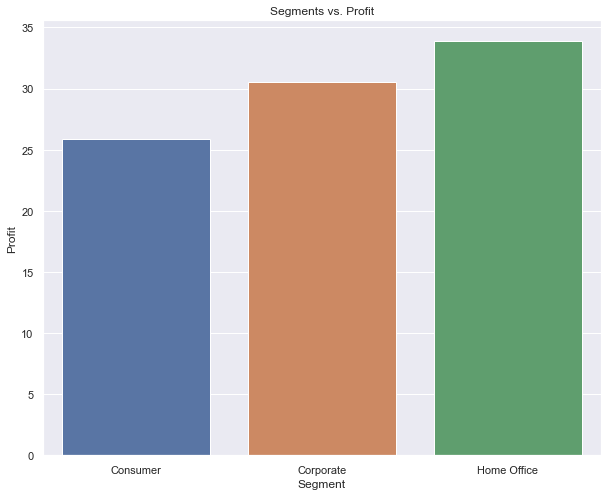

In [105]:
Segments = df.groupby('Segment')[['Sales','Profit']].mean().reset_index()
sns.set(rc = {'figure.figsize':(10,8)})

sns.barplot(x= 'Segment', y = 'Profit',data =Segments,dodge=False);

plt.title('Segments vs. Profit')
plt.xlabel('Segment')
plt.ylabel('Profit')

In [20]:
df['unit_price'] = df['Sales'] / df['Quantity']

In [21]:
df.groupby('Sub-Category')['unit_price'].mean().reset_index().sort_values(by='unit_price',ascending=False)

,Sub-Category,unit_price
6,Copiers,601.021029
11,Machines,423.352470
16,Tables,165.088613
5,Chairs,138.813738
4,Bookcases,131.100152
13,Phones,101.127993
14,Storage,70.451459
15,Supplies,69.308105
1,Appliances,60.618659
0,Accessories,55.356630


* Copiers and machines are the most expensive sub categories **while** Stationaries are the cheapest

In [22]:
df.groupby('Category')['Discount'].count().reset_index().sort_values(by='Discount',ascending=False)

,Category,Discount
1,Office Supplies,6012
0,Furniture,2118
2,Technology,1847


In [23]:
a = df.groupby('Category')[['Sales','Profit','Discount','unit_price']].mean().reset_index().sort_values(by='Discount',ascending=False)

Text(0, 0.5, 'Sales and profit')

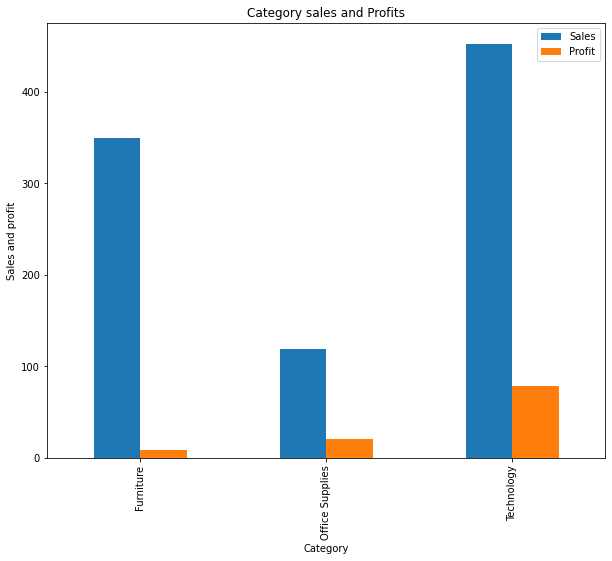

In [24]:
a[['Category','Sales','Profit']].plot(x= 'Category',kind = 'bar',figsize =(10,8))
plt.title('Category sales and Profits')
plt.xlabel('Category')
plt.ylabel('Sales and profit')


In [25]:
a = df.groupby('Ship Mode')[['Sales','Profit','Discount','unit_price']].mean().reset_index().sort_values(by='Discount',ascending=False)

<AxesSubplot:xlabel='Ship Mode'>

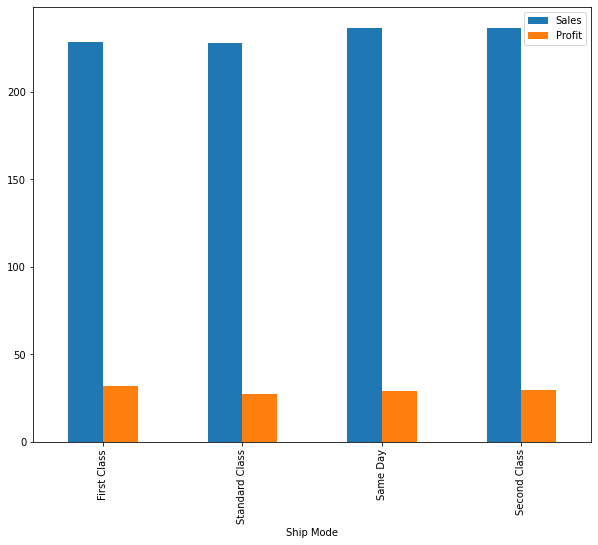

In [26]:
a[['Ship Mode','Sales','Profit']].plot(x= 'Ship Mode',kind = 'bar',figsize =(10,8))


Same Day shipping and the second class has the highest sales average  May be due to:
* Same day -> the urgent need 
* Seccond Class -> the reasonable price

First class shipping has the highest profit justified as:
*  it offers good service and high fees 